In [64]:
from scipy import io
from scipy.stats import mode
from heapq import nsmallest
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Matrix = io.loadmat('C:\Users\lhren\Desktop\Fall 2017/4771\hw\hw1data.mat')
X_Y = np.concatenate((Matrix['X'],Matrix['Y']),axis=1)
np.random.shuffle(X_Y)
X_Y = np.array(X_Y)
N = len(X_Y)
d = 784
X_train = X_Y[0:9000,0:d]
Y_train = X_Y[0:9000,d]
X_test = X_Y[9000:N,0:d]
Y_test = X_Y[9000:N,d]

n = len(X_train)

In [26]:
def V0(T,X_train,Y_train):
    n = len(Y_train)
    W = np.zeros((10,d))
    B = np.zeros(10)
    #ten binary classifiers
    for k in range(10):
        w = np.zeros(d)
        b = 0
        
        x_train = X_train
        y_train = 2*(Y_train==k) - np.ones(n)
    
        t = 1
        while t<=T:
            index = t%(n)
            y_i = y_train[index]
            x_i = x_train[index,:]
            if y_i*(sum(w*x_i)+b)<=0:
                w = w+y_i*x_i
                b = b+y_i
            t = t+1
        W[k,:] = w
        B[k] = b
    return W,B

500
1000
1500
2000
3000
4000
5000
6000
7000
8000
9000
10000


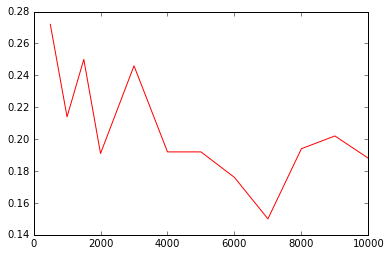

In [27]:
"""
#perceptron on digit k
k = 0
M = np.zeros((n,d+1))
for i in range(n):
    M[i,0:d] = X_train[i,:]
    #reform classification problem as binary
    if int(Y_train[i])==k:
        M[i,d] = 1
    else:
        M[i,d] = -1
x_train = M[:,0:d]
y_train = M[:,d]
"""
T_list = [500,1000,1500,2000,3000,4000,5000,6000,7000,8000,9000,10000]
#trainE_list = []
testE_list = []
for T in T_list:
    #V0
    print T
    #train_error = V0(T,X_train,Y_train,X_train,Y_train)
    #trainE_list.append(train_error)
    W,B = V0(T,X_train,Y_train)
    wrong = 0
    for j in range(len(X_test)):
        y_j = Y_test[j]
        x_j = X_test[j,:]
        prob = np.zeros(10)
        for i in range(10):
            prob[i] = sum(W[i,:]*x_j)+B[i]
        index = np.argmax(prob)
        if y_j!=index:
            wrong+=1
    test_error = wrong*1.0/len(X_test)
    testE_list.append(test_error)
#plt.plot(np.array(T_list),np.array(trainE_list),color='b')
plt.plot(np.array(T_list),np.array(testE_list),color='r')


In [57]:
def V1(T,X_train,Y_train):
    n = len(Y_train)
    W = np.zeros((10,d))
    B = np.zeros(10)
    #ten binary classifiers
    for k in range(10):
        print k
        w = np.zeros(d)
        b = 0
       
        x_train = X_train
        y_train = 2*(Y_train==k)-np.ones(n)
    
        t = 1
        while t<=T:
            #print t
            a = (np.dot(x_train,w)+b*np.ones(n))*y_train
            index = np.argmin(a)
            y_i = y_train[index]
            x_i = x_train[index,:]
            if y_i*(sum(w*x_i)+b)<=0:
                w = w+y_i*x_i
                b = b+y_i
            t = t+1
        W[k,:] = w
        B[k] = b
    return W,B
   

    


500
0
1
2
3
4
5
6
7
8
9
1000
0
1
2
3
4
5
6
7
8
9
1500
0
1
2
3
4
5
6
7
8
9


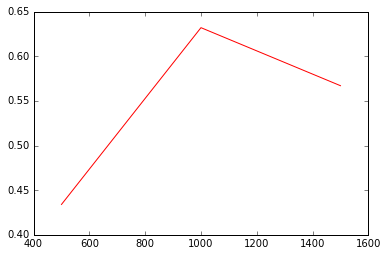

In [58]:
T_list = [300,400,500]#,2500,3000]
#trainE_list = []
testE_list = []
for T in T_list:
    #V1
    print T
    #train_error = V1(T,X_train,Y_train,X_train,Y_train)
    #trainE_list.append(train_error)
    W,B = V1(T,X_train,Y_train)
    wrong = 0
    for j in range(len(X_test)):
        y_j = Y_test[j]
        x_j = X_test[j,:]
        prob = np.zeros(10)
        for i in range(10):
            prob[i] = sum(W[i,:]*x_j)+B[i]
        index = np.argmax(prob)
        if y_j!=index:
            wrong+=1
    test_error = wrong*1.0/len(X_test)
    testE_list.append(test_error)
#plt.plot(np.array(T_list),np.array(trainE_list),color='b')
plt.plot(np.array(T_list),np.array(testE_list),color='r')

In [55]:
def V2(T,x_train,y_train):
    W = []
    B = []
    C = []
    #V2
    
    n = len(Y_train)
    #ten binary classifiers
    for k in range(10):
        print k
        w = []
        b = []
        c = []
        x_train = X_train
        y_train = 2*(Y_train==k)-np.ones(n)
    
        t = 1
        w_t = np.zeros(784)
        b_t=0
        c_t = 1
        while t<=T:
            index = t%(n)
            y_i = y_train[index]
            x_i = x_train[index,:]
            if y_i*sum(w_t*x_i+b_t)<=0:
                w.append(list(w_t))
                b.append(b_t)
                c.append(c_t)
                w_t += y_i*x_i
                b_t += y_i
                c_t = 1
            else: 
                c_t += 1
            t = t+1
        W.append(w)
        B.append(b)
        C.append(c)
    return W,B,C

1000
0
1
2
3
4
5
6
7
8
9
2000
0
1
2
3
4
5
6
7
8
9
3000
0
1
2
3
4
5
6
7
8
9


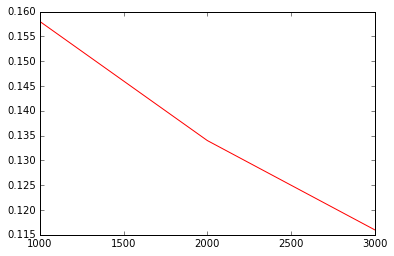

In [56]:
T_list = [1000,2000,3000]
#trainE_list = []
testE_list = []
for T in T_list:
    #V1
    print T
    #train_error = V1(T,X_train,Y_train,X_train,Y_train)
    #trainE_list.append(train_error)
    W,B,C = V2(T,X_train,Y_train)
    wrong = 0
    for j in range(len(X_test)):
        y_j = Y_test[j]
        x_j = X_test[j,:]
        prob = np.zeros(10)
        for i in range(10):
            w = W[i]
            b = B[i]
            c = C[i]
            prob[i] = sum(c*(np.dot(w,x_j)+b))
        index = np.argmax(prob)
        if y_j!=index:
            wrong+=1
    test_error = wrong*1.0/len(X_test)
    testE_list.append(test_error)
#plt.plot(np.array(T_list),np.array(trainE_list),color='b')
plt.plot(np.array(T_list),np.array(testE_list),color='r')

In [65]:
def kernel_V0(T,X_train,Y_train):
    n = len(Y_train)
    Alpha = np.zeros((10,n))
    Y = []
    #ten binary classifiers
    for k in range(10):
        print k
        alpha = np.zeros(n)
        y_train = 2*(Y_train==k) - np.ones(n)
        Y.append(y_train)
        x_train = X_train
    
        t = 1
        while t<=T:
            #print t
            index = t%(n)
            x_i = x_train[index,:]
            y_i = y_train[index]
            ker_dot =(np.dot(x_train,x_i)+2*np.ones(n))**10
            if y_i*sum(alpha*(y_train*ker_dot))<=0:
                alpha[index]+=1
            t = t+1
        Alpha[k,:] = alpha
    return Alpha,Y

In [ ]:
T_list = [500]#,3000,4000,5000,6000,7000,8000,9000,10000]
#trainE_list = []
testE_list = []
n = len(Y_train)
for T in T_list:
    #V0
    print T
    #train_error = V0(T,X_train,Y_train,X_train,Y_train)
    #trainE_list.append(train_error)
    Alpha,Y = kernel_V0(T,X_train,Y_train)
    wrong = 0
    for j in range(len(X_test)):
        print j
        y_j = Y_test[j]
        x_j = X_test[j,:]
        prob = np.zeros(10)
        for k in range(10):
            y_train = Y[k]
            ker_dot =(np.dot(X_train,x_j)+2*np.ones(n))**10
            prob[k] = sum(Alpha[k,:]*(y_train*ker_dot))
        index = np.argmax(prob)
        if y_j!=index:
            wrong+=1
    test_error = wrong*1.0/len(X_test)
    testE_list.append(test_error)
    print wrong
#plt.plot(np.array(T_list),np.array(trainE_list),color='b')
#plt.plot(np.array(T_list),np.array(testE_list),color='ro')

1000
0
1
2
3


In [67]:
wrong

888